In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import base64
from IPython.display import display, HTML
import ipynbname
from pathlib import Path
from pyvis.network import Network
import json

def create_pyvis_graph(G, filename, title, directed=False):
    """
    Универсальная функция для создания графа Pyvis из графа NetworkX.
    Исправлена ошибка кодировки на Windows.
    """
    filename = str(Path(ipynbname.path().parent)) + "\\" + filename
    net = Network(height="600px", width="100%", directed=directed, notebook=False, cdn_resources='in_line')
    
    net.from_nx(G)
    
    options = {
            "edges": {
                "color": {
                    "color": "#2B7CE9",  # Стандартный цвет
                    "highlight": "#FF0000",  # Цвет подсветки
                    "hover": "#FF0000"       # Цвет при наведении
                },
                "selectionWidth": 3,  # Толщина выделенных рёбер
                "smooth": False
            },
            "interaction": {
                "hoverConnectedEdges": True,
                "selectConnectedEdges": True,  # Автоматический выбор связанных рёбер
                "multiselect": True,
                "navigationButtons": True,
                "keyboard":True,
                "hover": True,
                "click": True,
            },
            "physics": {
                "enabled": True,
                "forceAtlas2Based": {
                    "gravitationalConstant": -200,  # Увеличьте отталкивание (от -50 до -500)
                    "springLength": 500,           # Длина связей между узлами (от 100 до 500)
                    "springConstant": 0.001,        # Жесткость связей (от 0.001 до 0.1)
                    "damping": 0.3,                # Затухание движения (0-1)
                    "avoidOverlap": 1              # Избегать пересечений (0-1)
                },
                "stabilization": {
                    "iterations": 500,             # Итераций для стабилизации
                    "updateInterval": 50
                }
            },
            "nodes": {
                "allow_html": True,  # Включаем поддержку HTML
                "shape": "box",  # Обязательно для кликабельности [[8]]
                "font": {"size": 10},
                "color": {
                    "border": "#2B7CE9",
                    "background": "#97C2FC",
                    "highlight": {
                        "border": "#FF0000",  # Цвет границы узла при выделении
                        "background": "#FFFF00"
                    }
                },
                "chosen": True,
                "style": "cursor: pointer;",
                "shapeProperties": {
                    "allowHtml": True  # Правильный параметр вместо allow_html [[9]]
                    }
            },
        
            "configure": {
                "enabled": False,
                "filter": "nodes,edges",
                "showButton": False
            },
            "version": "9.1.2" 
            }
    
    if directed:
        options["edges"]["arrows"] = {"to": {"enabled": True, "scaleFactor": 1}}

    net.set_options(json.dumps(options))
    
    try:
        html_content = net.generate_html()
        
        with open(filename, "w", encoding="utf-8") as f:
            f.write(html_content)
            
        print(f"Успешно создан файл: {filename} ({title})")
        
    except Exception as e:
        print(f"Ошибка при сохранении {filename}: {e}")
        
    return filename

def show_html_file(filename):
    try:
        with open(filename, "rb") as f:
            html_content = f.read()
            
        b64_content = base64.b64encode(html_content).decode('utf-8')
        data_url = f'data:text/html;charset=utf-8;base64,{b64_content}'
        iframe = f'<iframe src="{data_url}" width="100%" height="650px" style="border: 1px solid #ddd; border-radius: 5px;"></iframe>'
        
        display(HTML(iframe))
        
    except FileNotFoundError:
        print(f"Файл {filename} не найден. Проверьте путь.")
        


# Классная работа


## 1

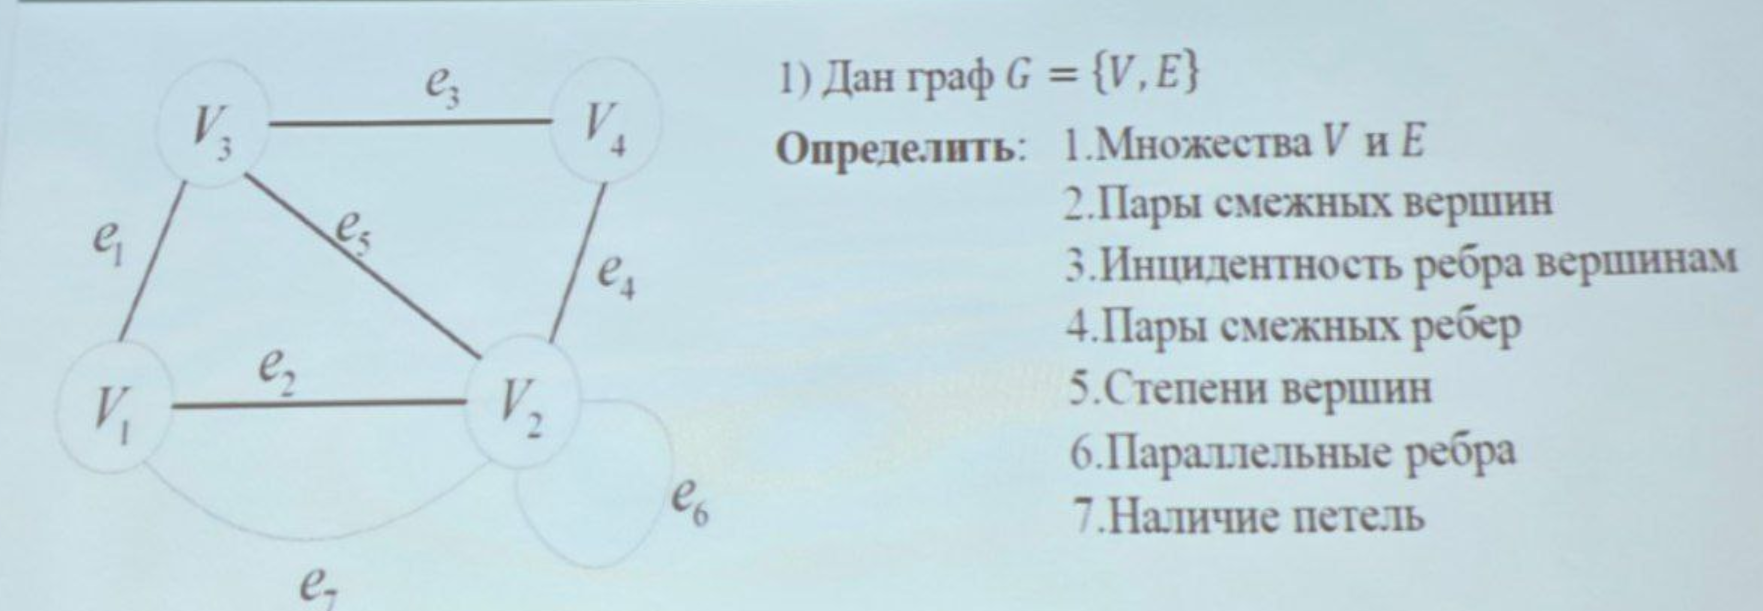

In [32]:
G1 = nx.MultiGraph()


relations = [
    ('V1', 'V3', 'e1'),
    ('V1', 'V2', 'e2'),
    ('V3', 'V4', 'e3'),
    ('V4', 'V2', 'e4'),
    ('V3', 'V2', 'e5'),
    ('V2', 'V2', 'e6'),
    ('V1', 'V2', 'e7') 
]

for u, v, name in relations:
    G1.add_edge(u, v, label=name)


print(f"1. V (Вершины): {list(G1.nodes())}")
edge_names = [data['label'] for u, v, data in G1.edges(data=True)]
print(f"   E (Ребра): {edge_names}")

adj_pairs = set()
for u, v in G1.edges():
    if u != v:
        pair = tuple(sorted((u, v)))
        adj_pairs.add(pair)
print(f"2. Смежные вершины: {adj_pairs}")

print("3. Инцидентность:")
for u, v, data in G1.edges(data=True):
    print(f"   Ребро {data['label']} инцидентно вершинам ({u}, {v})")

print("5. Степени вершин:")
for node in G1.nodes():
    print(f"   deg({node}) = {G1.degree[node]}")

print("6. Параллельные ребра:")
for u in G1.nodes():
    for v in G1.nodes():

        if u < v and G1.has_edge(u, v): 
            if len(G1[u][v]) > 1:
                edges_between = [attr['label'] for attr in G1[u][v].values()]
                print(f"   Между {u} и {v}: {edges_between}")

print(f"7. Петли: {[data['label'] for u, v, data in G1.edges(data=True) if u == v]}")


filename = "renders/graph_1_undirected.html"
create_pyvis_graph(G1, filename, "Задание 1", directed=False)
show_html_file(filename)

1. V (Вершины): ['V1', 'V3', 'V2', 'V4']
   E (Ребра): ['e1', 'e2', 'e7', 'e3', 'e5', 'e4', 'e6']
2. Смежные вершины: {('V1', 'V2'), ('V2', 'V3'), ('V1', 'V3'), ('V3', 'V4'), ('V2', 'V4')}
3. Инцидентность:
   Ребро e1 инцидентно вершинам (V1, V3)
   Ребро e2 инцидентно вершинам (V1, V2)
   Ребро e7 инцидентно вершинам (V1, V2)
   Ребро e3 инцидентно вершинам (V3, V4)
   Ребро e5 инцидентно вершинам (V3, V2)
   Ребро e4 инцидентно вершинам (V2, V4)
   Ребро e6 инцидентно вершинам (V2, V2)
5. Степени вершин:
   deg(V1) = 3
   deg(V3) = 3
   deg(V2) = 6
   deg(V4) = 2
6. Параллельные ребра:
   Между V1 и V2: ['e2', 'e7']
7. Петли: ['e6']
Успешно создан файл: c:\Projects\FU\Course_3\GRAPHS\renders/graph_1_undirected.html (Задание 1)


c:\Projects\FU\.venv\Lib\site-packages\IPython\core\display.py:447: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## 2

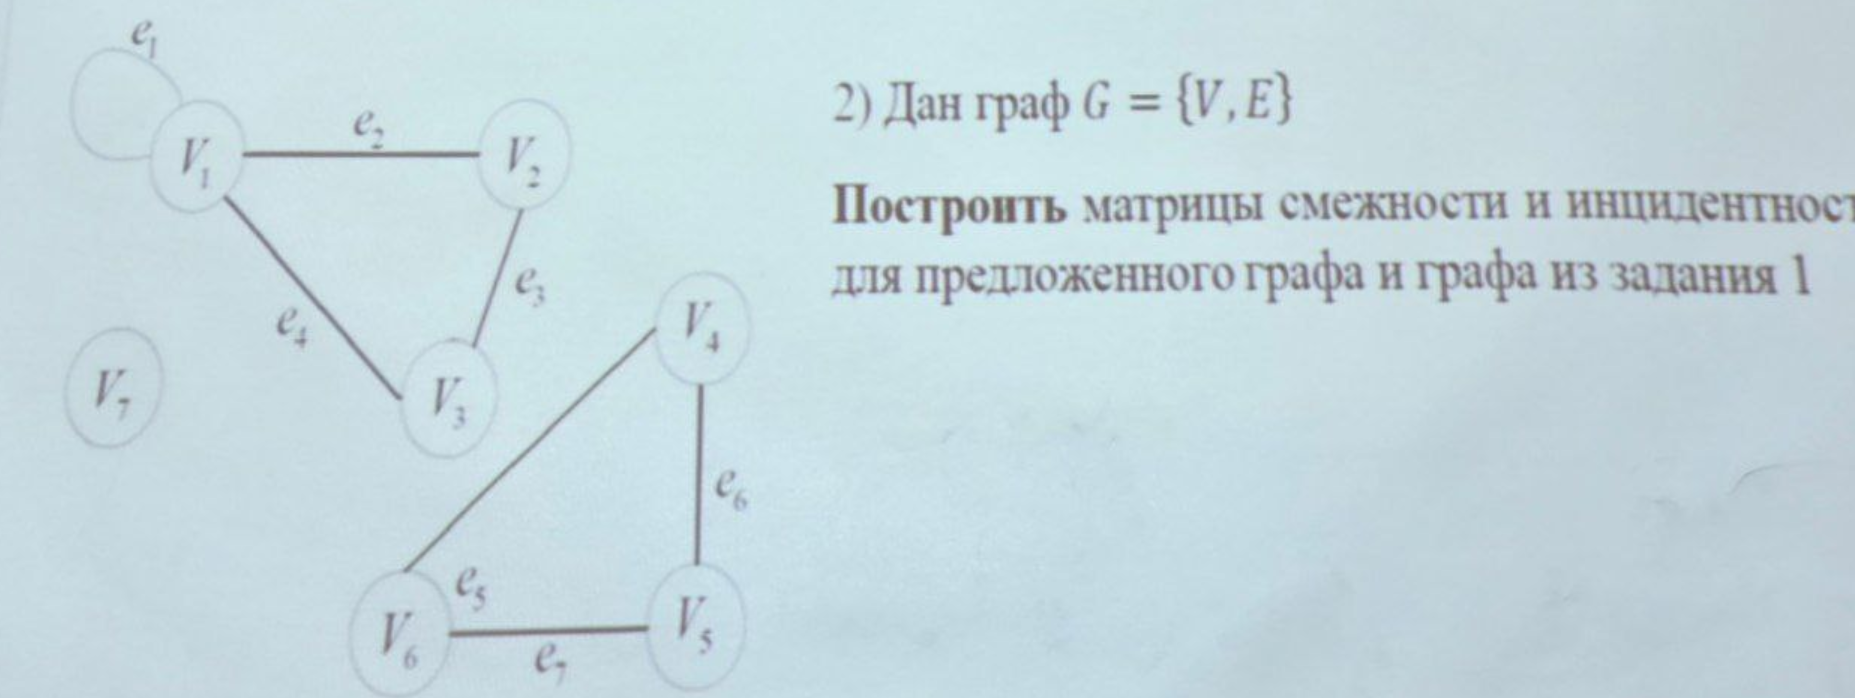

In [33]:
def get_matrices(G):
    if not isinstance(G, (nx.Graph, nx.DiGraph)):
        raise TypeError("Input must be a NetworkX Graph or DiGraph object")

    nodes = sorted(list(G.nodes()))
    adj_matrix = nx.to_numpy_array(G, nodelist=nodes, dtype=int, multigraph_weight=sum)
    df_adj = pd.DataFrame(adj_matrix, index=nodes, columns=nodes)
    
    if G.number_of_edges() == 0:
        df_inc = pd.DataFrame(index=nodes)
        return df_adj, df_inc

    edges_data = []
    edge_list = list(G.edges(data=True))
    for i, (u, v, data) in enumerate(edge_list):
        label = data.get('label', f'e{i+1}')
        edges_data.append((label, u, v))
    
    try:
        edges_data.sort(key=lambda x: int(x[0][1:]))
    except (ValueError, IndexError):
        edges_data.sort(key=lambda x: x[0])
    
    edge_names = [e[0] for e in edges_data]
    inc_matrix = np.zeros((len(nodes), len(edge_names)), dtype=int)
    
    is_directed = G.is_directed()
    
    for col_idx, (label, u, v) in enumerate(edges_data):
        row_u = nodes.index(u)
        
        if u == v: # Loop
            inc_matrix[row_u, col_idx] = 2
        else:
            row_v = nodes.index(v)
            if is_directed:
                inc_matrix[row_u, col_idx] = 1
                inc_matrix[row_v, col_idx] = -1
            else:
                inc_matrix[row_u, col_idx] = 1
                inc_matrix[row_v, col_idx] = 1
            
    df_inc = pd.DataFrame(inc_matrix, index=nodes, columns=edge_names)
    
    return df_adj, df_inc

In [34]:
G2 = nx.MultiGraph()
G2.add_node('V7')
relations_g2 = [
    ('V1', 'V1', 'e1'),
    ('V1', 'V2', 'e2'),
    ('V2', 'V3', 'e3'),
    ('V3', 'V1', 'e4'),
    ('V6', 'V4', 'e5'),
    ('V4', 'V5', 'e6'),
    ('V5', 'V6', 'e7')  
]
for u, v, name in relations_g2:
    G2.add_edge(u, v, label=name)

# Получаем таблицы
adj1, inc1 = get_matrices(G1)
adj2, inc2 = get_matrices(G2)

print("=== ЗАДАНИЕ 1 (Прошлый граф) ===")
print("Матрица смежности:")
print(adj1)
print("\nМатрица инцидентности:")
print(inc1)

print("\n" + "="*40 + "\n")

print("=== ЗАДАНИЕ 2 (Новый граф) ===")
print("Матрица смежности:")
print(adj2)
print("\nМатрица инцидентности:")
print(inc2)

filename = "renders/graph_2_undirected.html"
create_pyvis_graph(G2, filename, "Задание 2", directed=False)
show_html_file(filename)

=== ЗАДАНИЕ 1 (Прошлый граф) ===
Матрица смежности:
    V1  V2  V3  V4
V1   0   2   1   0
V2   2   1   1   1
V3   1   1   0   1
V4   0   1   1   0

Матрица инцидентности:
    e1  e2  e3  e4  e5  e6  e7
V1   1   1   0   0   0   0   1
V2   0   1   0   1   1   2   1
V3   1   0   1   0   1   0   0
V4   0   0   1   1   0   0   0


=== ЗАДАНИЕ 2 (Новый граф) ===
Матрица смежности:
    V1  V2  V3  V4  V5  V6  V7
V1   1   1   1   0   0   0   0
V2   1   0   1   0   0   0   0
V3   1   1   0   0   0   0   0
V4   0   0   0   0   1   1   0
V5   0   0   0   1   0   1   0
V6   0   0   0   1   1   0   0
V7   0   0   0   0   0   0   0

Матрица инцидентности:
    e1  e2  e3  e4  e5  e6  e7
V1   2   1   0   1   0   0   0
V2   0   1   1   0   0   0   0
V3   0   0   1   1   0   0   0
V4   0   0   0   0   1   1   0
V5   0   0   0   0   0   1   1
V6   0   0   0   0   1   0   1
V7   0   0   0   0   0   0   0
Успешно создан файл: c:\Projects\FU\Course_3\GRAPHS\renders/graph_2_undirected.html (Задание 2)


c:\Projects\FU\.venv\Lib\site-packages\IPython\core\display.py:447: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## 3

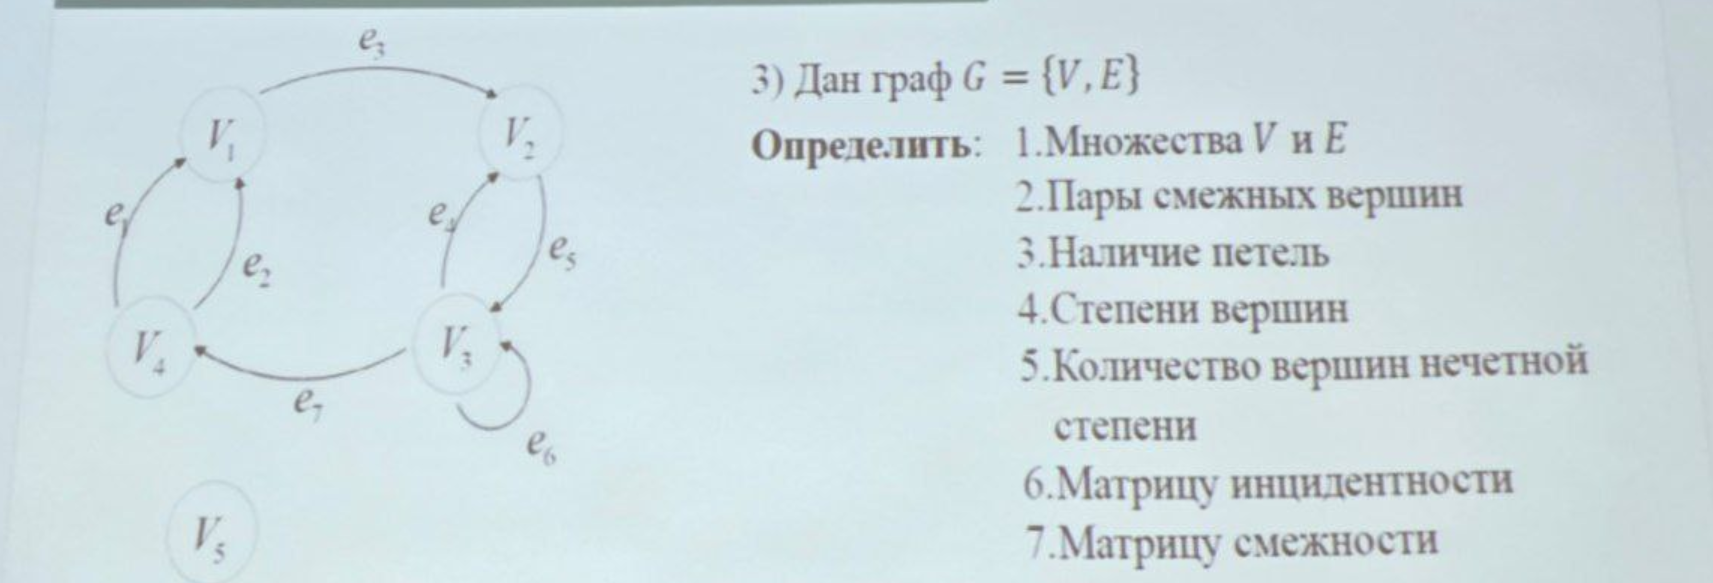

In [35]:
G3 = nx.MultiDiGraph()
nodes = ['V1', 'V2', 'V3', 'V4', 'V5']
G3.add_nodes_from(nodes)

edges = [
    ('V4', 'V1', 'e1'), ('V4', 'V1', 'e2'),
    ('V1', 'V2', 'e3'),
    ('V3', 'V2', 'e4'), ('V2', 'V3', 'e5'),
    ('V3', 'V3', 'e6'), 
    ('V3', 'V4', 'e7')
]
for u, v, label in edges:
    G3.add_edge(u, v, label=label)

nodes = sorted(list(G3.nodes()))
edge_names = sorted([data['label'] for u, v, data in G3.edges(data=True)])
print(f"1. V (Вершины): {nodes}")
print(f"   E (Ребра): {edge_names}")

adj_pairs = []
for u, v in G3.edges():
    if u != v:
        pair = f"{u}->{v}"
        if pair not in adj_pairs:
            adj_pairs.append(pair)
print(f"2. Смежные вершины (направления): {adj_pairs}")

loops = [data['label'] for u, v, data in G3.edges(data=True) if u == v]
print(f"3. Петли: Есть! Это {loops}")

print("4. Степени вершин (Total = In + Out):")
deg_info = {}
for n in nodes:
    in_d = G3.in_degree(n)
    out_d = G3.out_degree(n)
    total = in_d + out_d
    deg_info[n] = total
    print(f"   {n}: In={in_d}, Out={out_d}, Total={total}")

odd_degree_nodes = [n for n, d in deg_info.items() if d % 2 != 0]
print(f"5. Вершин нечетной степени: {len(odd_degree_nodes)} (Это {odd_degree_nodes})")


inc_cols = sorted(list(set(edge_names)), key=lambda x: int(x[1:]))
inc_matrix = pd.DataFrame(0, index=nodes, columns=inc_cols)

for u, v, data in G3.edges(data=True):
    lbl = data['label']
    if u == v:

        inc_matrix.loc[u, lbl] = 2 
    else:
        inc_matrix.loc[u, lbl] = -1
        inc_matrix.loc[v, lbl] = 1

print("\n6. Матрица Инцидентности (-1: выход, 1: вход, 2: петля):")
print(inc_matrix)

adj_matrix = pd.DataFrame(0, index=nodes, columns=nodes)
for u, v in G3.edges():
    adj_matrix.loc[u, v] += 1

print("\n7. Матрица Смежности (строки -> столбцы):")
print(adj_matrix)


filename = "renders/graph_3_directed.html"
create_pyvis_graph(G3, filename, "Задание 3", directed=True)
show_html_file(filename)

1. V (Вершины): ['V1', 'V2', 'V3', 'V4', 'V5']
   E (Ребра): ['e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7']
2. Смежные вершины (направления): ['V1->V2', 'V2->V3', 'V3->V2', 'V3->V4', 'V4->V1']
3. Петли: Есть! Это ['e6']
4. Степени вершин (Total = In + Out):
   V1: In=2, Out=1, Total=3
   V2: In=2, Out=1, Total=3
   V3: In=2, Out=3, Total=5
   V4: In=1, Out=2, Total=3
   V5: In=0, Out=0, Total=0
5. Вершин нечетной степени: 4 (Это ['V1', 'V2', 'V3', 'V4'])

6. Матрица Инцидентности (-1: выход, 1: вход, 2: петля):
    e1  e2  e3  e4  e5  e6  e7
V1   1   1  -1   0   0   0   0
V2   0   0   1   1  -1   0   0
V3   0   0   0  -1   1   2  -1
V4  -1  -1   0   0   0   0   1
V5   0   0   0   0   0   0   0

7. Матрица Смежности (строки -> столбцы):
    V1  V2  V3  V4  V5
V1   0   1   0   0   0
V2   0   0   1   0   0
V3   0   1   1   1   0
V4   2   0   0   0   0
V5   0   0   0   0   0
Успешно создан файл: c:\Projects\FU\Course_3\GRAPHS\renders/graph_3_directed.html (Задание 3)


c:\Projects\FU\.venv\Lib\site-packages\IPython\core\display.py:447: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## 4

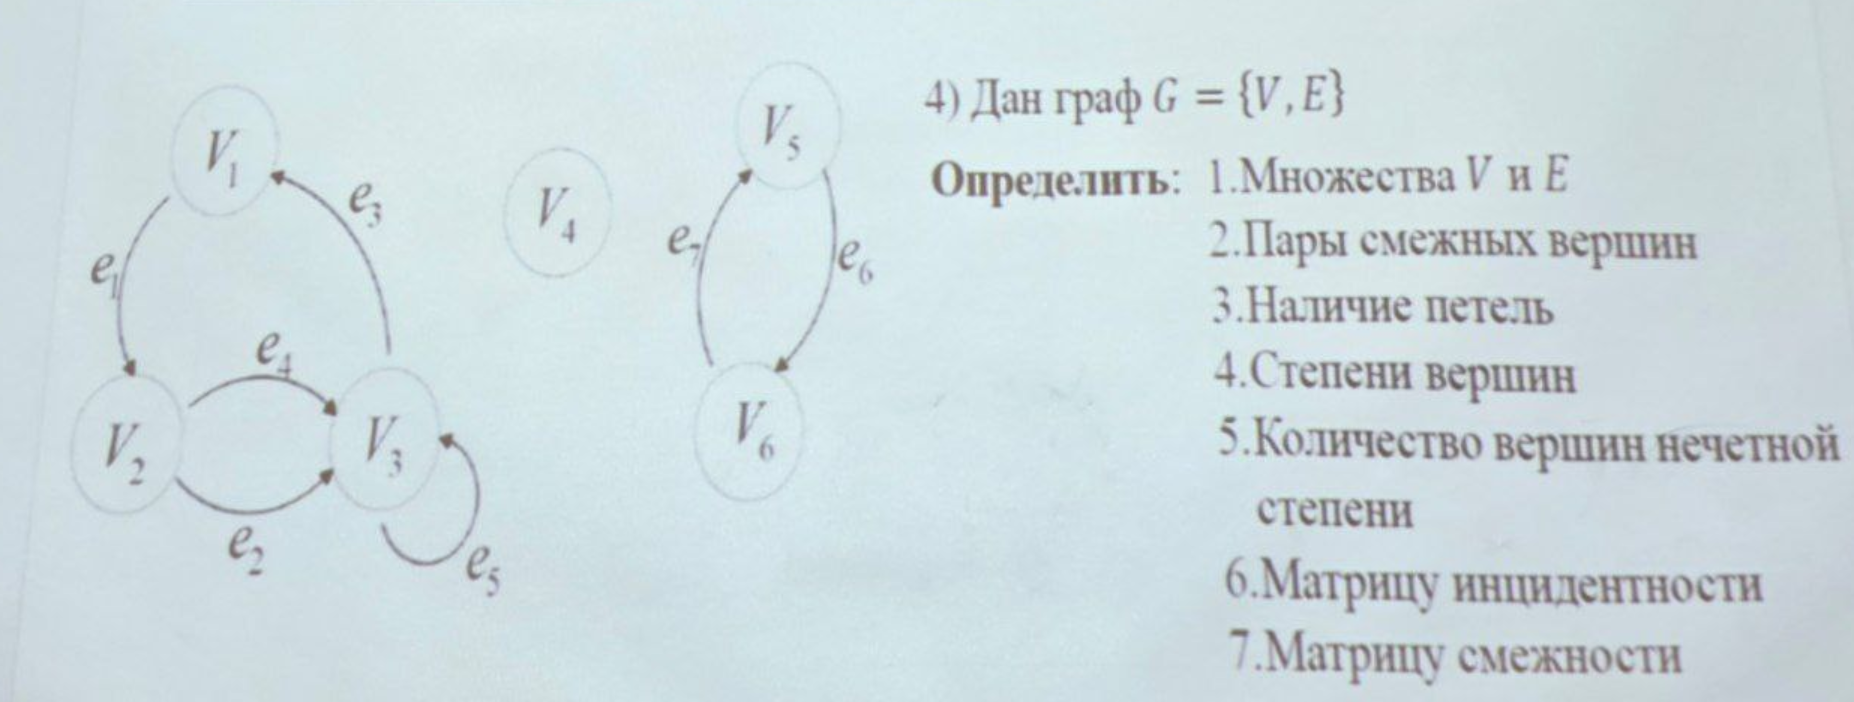

In [36]:
G4 = nx.MultiDiGraph()
nodes = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6']
G4.add_nodes_from(nodes)

edges_data = [
    ('V1', 'V2', 'e1'),
    ('V2', 'V3', 'e2'),
    ('V3', 'V1', 'e3'),
    ('V2', 'V3', 'e4'), 
    ('V3', 'V3', 'e5'), 
    ('V5', 'V6', 'e6'),
    ('V6', 'V5', 'e7')
]

for u, v, label in edges_data:
    G4.add_edge(u, v, label=label)

print("1. Множества:")
print(f"   V = {set(nodes)}")
print(f"   E = {[d['label'] for u, v, d in G4.edges(data=True)]}")

print("\n2. Пары смежных вершин (направленные):")
adj_pairs = sorted(list(set([(u, v) for u, v in G4.edges() if u != v])))
print(f"   {adj_pairs}")

print("\n3. Наличие петель:")
loops = [d['label'] for u, v, d in G4.edges(data=True) if u == v]
print(f"   Есть петля: {loops}" if loops else "   Петель нет")

print("\n4. Степени вершин (Входящие + Исходящие):")
degrees = {}
for n in nodes:
    deg = G4.degree(n)
    degrees[n] = deg
    print(f"   deg({n}) = {deg} (In: {G4.in_degree(n)}, Out: {G4.out_degree(n)})")

print("\n5. Количество вершин нечетной степени:")
odd_nodes = [n for n, d in degrees.items() if d % 2 != 0]
print(f"   Количество: {len(odd_nodes)} ({odd_nodes})")


edge_labels = [f'e{i}' for i in range(1, 8)]
inc_df = pd.DataFrame(0, index=nodes, columns=edge_labels)
for u, v, d in G4.edges(data=True):
    lbl = d['label']
    if u == v:
        inc_df.loc[u, lbl] = 2 # Петля
    else:
        inc_df.loc[u, lbl] = -1
        inc_df.loc[v, lbl] = 1

print("\n6. Матрица инцидентности (-1:выход, 1:вход, 2:петля):")
print(inc_df)

adj_matrix = nx.to_numpy_array(G4, nodelist=nodes, dtype=int)
adj_df = pd.DataFrame(adj_matrix, index=nodes, columns=nodes)
print("\n7. Матрица смежности:")
print(adj_df)


filename = "renders/graph_4_undirected.html"
create_pyvis_graph(G4, filename, "Задание 4", directed=True)
show_html_file(filename)

1. Множества:
   V = {'V1', 'V3', 'V5', 'V4', 'V6', 'V2'}
   E = ['e1', 'e2', 'e4', 'e3', 'e5', 'e6', 'e7']

2. Пары смежных вершин (направленные):
   [('V1', 'V2'), ('V2', 'V3'), ('V3', 'V1'), ('V5', 'V6'), ('V6', 'V5')]

3. Наличие петель:
   Есть петля: ['e5']

4. Степени вершин (Входящие + Исходящие):
   deg(V1) = 2 (In: 1, Out: 1)
   deg(V2) = 3 (In: 1, Out: 2)
   deg(V3) = 5 (In: 3, Out: 2)
   deg(V4) = 0 (In: 0, Out: 0)
   deg(V5) = 2 (In: 1, Out: 1)
   deg(V6) = 2 (In: 1, Out: 1)

5. Количество вершин нечетной степени:
   Количество: 2 (['V2', 'V3'])

6. Матрица инцидентности (-1:выход, 1:вход, 2:петля):
    e1  e2  e3  e4  e5  e6  e7
V1  -1   0   1   0   0   0   0
V2   1  -1   0  -1   0   0   0
V3   0   1  -1   1   2   0   0
V4   0   0   0   0   0   0   0
V5   0   0   0   0   0  -1   1
V6   0   0   0   0   0   1  -1

7. Матрица смежности:
    V1  V2  V3  V4  V5  V6
V1   0   1   0   0   0   0
V2   0   0   2   0   0   0
V3   1   0   1   0   0   0
V4   0   0   0   0   0   0
V5   

c:\Projects\FU\.venv\Lib\site-packages\IPython\core\display.py:447: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## 5

In [37]:
def from_matrices(incident=None, smezh=None):
    if incident is None and smezh is None:
        raise RuntimeError("At least one matrix must be defined")
    
    if incident is not None:
        incident = np.array(incident)
        rows, cols = incident.shape
        
        is_directed = np.any(incident < 0)
        
        if is_directed:
            G = nx.MultiDiGraph()
        else:
            G = nx.MultiGraph()
            
        for i in range(rows):
            G.add_node(f"v{i+1}")
            
        for j in range(cols):
            col = incident[:, j]
            
            if is_directed:
                source = np.where(col == 1)[0]
                target = np.where(col == -1)[0]
                loop   = np.where(col == 2)[0]
                
                if len(source) == 1 and len(target) == 1:
                    u, v = source[0], target[0]
                    G.add_edge(f"v{u+1}", f"v{v+1}", label=f"e{j+1}")
                elif len(loop) == 1:
                    u = loop[0]
                    G.add_edge(f"v{u+1}", f"v{u+1}", label=f"e{j+1}")
            
            else:
                connected_nodes = np.where(col != 0)[0]
                if len(connected_nodes) == 2:
                    u, v = connected_nodes
                    G.add_edge(f"v{u+1}", f"v{v+1}", label=f"e{j+1}")
                elif len(connected_nodes) == 1:
                    u = connected_nodes[0]
                    G.add_edge(f"v{u+1}", f"v{u+1}", label=f"e{j+1}")

    elif smezh is not None:
        G = nx.MultiGraph()
        smezh = np.array(smezh)
        rows, cols = smezh.shape
        for i in range(rows):
            G.add_node(f"v{i+1}")
            for j in range(i, cols):
                count = smezh[i, j]
                if count > 0:
                    for _ in range(count):
                        G.add_edge(f"v{i+1}", f"v{j+1}")

    return G

In [38]:

A1 = [
    [1, 1, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 2, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 1, 1, 1, 0]  
]
G5_A1 = from_matrices(incident=A1)
filename = "renders/1_G5_A1.html"
create_pyvis_graph(G5_A1, filename, "G5_A1", directed=True)
show_html_file(filename)

Успешно создан файл: c:\Projects\FU\Course_3\GRAPHS\renders/1_G5_A1.html (G5_A1)


In [39]:
B1 = [
    [0, 1, 2, 0, 0, 0],
    [1, 0, 1, 0, 0, 0],
    [2, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 2],
    [0, 0, 0, 1, 0, 1],
    [0, 0, 0, 2, 1, 0]
]

G5_B1 = from_matrices(incident=A1)
filename = "renders/1_G5_B1.html"
create_pyvis_graph(G5_B1, filename, "G5_B1", directed=True)
show_html_file(filename)

Успешно создан файл: c:\Projects\FU\Course_3\GRAPHS\renders/1_G5_B1.html (G5_B1)


## 6

In [42]:
A2 = [
    [ 1,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0],
    [-1,  1,  0,  0, -1,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  1,  1,  1,  0,  1,  1,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  1, -1,  0, -1,  0],
    [ 0,  0, -1,  0,  0,  0,  0,  0, -1,  1,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
    [ 0, -1,  1, -1,  0,  0,  0,  0,  0,  0,  0], 
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2]
]

G6 = from_matrices(incident=A2)

smezh,_ = get_matrices(G6)

print(smezh)

    v1  v2  v3  v4  v5  v6  v7  v8
v1   0   1   0   0   0   0   0   0
v2   0   0   0   0   0   0   1   0
v3   1   1   0   1   1   0   1   0
v4   1   0   0   0   0   0   0   0
v5   0   0   0   1   0   0   0   0
v6   0   0   0   0   0   0   0   0
v7   0   0   0   0   1   0   0   0
v8   0   0   0   0   0   0   0   1


# Самостоятельные задания


1. 200, при условии, что дороги куда-то ведут (в города страны). 400, если дороги просто выходят
2. 
    * a) 4
    * b) $\infty$
3. 
    * a)
        * Эйлеров цикл: 5 - 4 - 3 - 2 - 1 - 3 - 5 - 1
        * Гамильтонов цикл: 1 - 2 - 3 - 4 - 5
    * b)
        * Эйлеров цикл: невозможен. 
        * Гамильтонов цикл: 1 - 2 - 3 - 4 - 5 - 6 - 7
4. Если в графе с 5 вершинами есть вершина со степенью 4, это означает, что она соединена со всеми остальными 4 вершинами графа. Если в этом же графе есть вершина со степенью 0, это означает, что она изолирована и не соединена ни с одной другой вершиной. Эти два условия не могут выполняться одновременно. Вершина степени 4 «обязана» быть соединена с вершиной степени 0, но вершина степени 0 «не имеет права» быть ни с кем соединенной.
5. Существует. Выполняется лемма о рукопожатиях (сумма степеней(20) - четная). По алгоритму Гавела-Хакими - существует.
6. В связном графе между всеми $n$ вершинами должно быть как минимум $n-1$ ребер. 
Обозначим количество авиалиний у каждой компании как $a,b$ и $c$, тогда общее количество авиалиний $∣E∣=a+b+c$. 
Тогда как, если убрать любую одну авиакомпанию, граф остается связным, то получаем систему неравенств
$$
a + b \ge 14\\
a + c \ge 14\\
c + b \ge 14
$$

Сложим все 3 неравенства в одно и выполним преобразования

$$
(a+b)+(a+c)+(c+b) \ge 14 + 14 + 14\\
2\times(a+b+c) \ge 42\\
a+b+c\ge21
$$

Ответ 21